import data dari gitlab

In [176]:
import numpy as np
import pandas as pd

# URL of the raw CSV file in GitLab
url  = 'https://gitlab.com/222011585/datmin-clustering-exercise-week-10-11/-/raw/master/Country-data.csv'
df_real = pd.read_csv(url)

# Make df as dataframe
df_real = pd.DataFrame(df_real)
df_real.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [177]:
# Pilih column yang akan kita pakai
df_temp1 = df_real[['country', 'child_mort' , 'gdpp']]
df_temp1.head()

,country,child_mort,gdpp
0,Afghanistan,90.2,553
1,Albania,16.6,4090
2,Algeria,27.3,4460
3,Angola,119.0,3530
4,Antigua and Barbuda,10.3,12200


In [178]:
# Pilih hanya variabel numeric, lalu di standarisasikan
df_temp2 = df_temp1[['child_mort' , 'gdpp']]
df_temp2 =  StandardScaler().fit_transform(df_temp2)

Jumlah Clusters: 3
Jumlah Noise Point: 13
Jumlah Cluster ke- 0 :  131
Jumlah Cluster ke- 1 :  16
Jumlah Cluster ke- 2 :  7


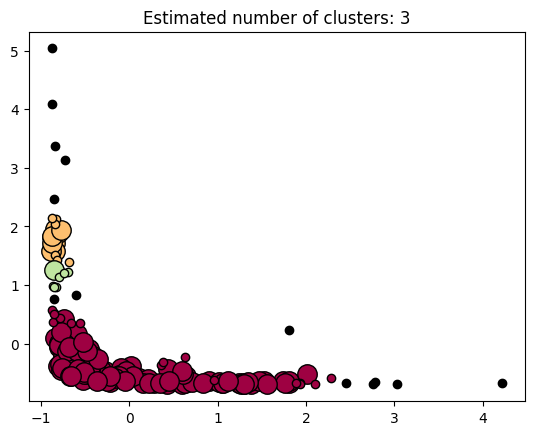

In [206]:
# ======================================================================
# DBSCAN clustering
# ======================================================================
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# ######################################################################
# Compute DBSCAN
db = DBSCAN(eps = 0.3, min_samples = 10).fit(df_temp2)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Jumlah Clusters: %d' % n_clusters_)
print('Jumlah Noise Point: %d' % n_noise_)
for i in range(0,n_clusters_)  :
  print('Jumlah Cluster ke-' , i ,': ', list(labels).count(i))

# ######################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = (labels == k)
  xy = df_temp2[class_member_mask & core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'k', markersize = 14)
  xy = df_temp2[class_member_mask & ~core_samples_mask]
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col),markeredgecolor = 'k', markersize = 6)
  
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

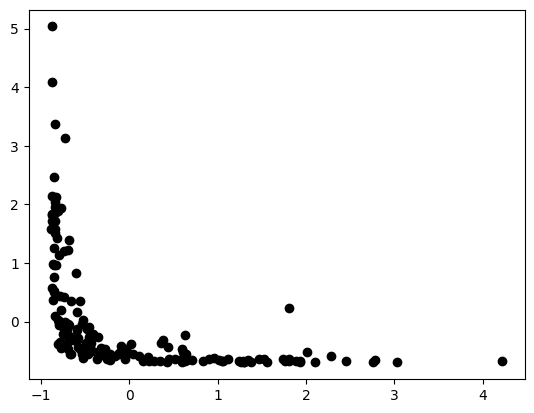

In [199]:
plt.plot(df_temp2[:, 0], df_temp2[:, 1], 'o', markerfacecolor = tuple(col),markeredgecolor = 'k', markersize = 6)

In [181]:
# ====================================================================
# Gaussian mixture model for clustering
# ====================================================================
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
# ######################################################################

In [194]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = n_clusters_).fit(df_temp2)
proba = gmm.predict_proba(df_temp2)
y_gmm = gmm.predict(df_temp2)

print(y_gmm)

[0 2 2 0 2 2 2 1 1 0 1 1 0 2 1 1 2 0 0 0 1 0 2 1 2 0 0 0 0 1 2 0 0 2 2 2 0
 0 0 2 0 2 1 1 1 0 2 2 2 0 0 1 2 1 1 0 0 2 1 0 1 2 0 0 0 0 0 2 1 0 0 2 0 1
 1 1 2 1 2 2 0 0 1 2 0 2 2 0 0 2 2 1 2 0 0 2 2 0 1 0 2 0 2 2 2 0 0 0 0 0 1
 1 0 0 1 1 0 2 2 2 0 2 1 1 2 2 0 2 2 0 2 2 0 1 1 1 2 0 1 1 2 2 0 2 1 1 0 0
 2 0 0 2 2 2 0 0 2 1 1 1 2 0 2 2 2 0 0]


65
41
61


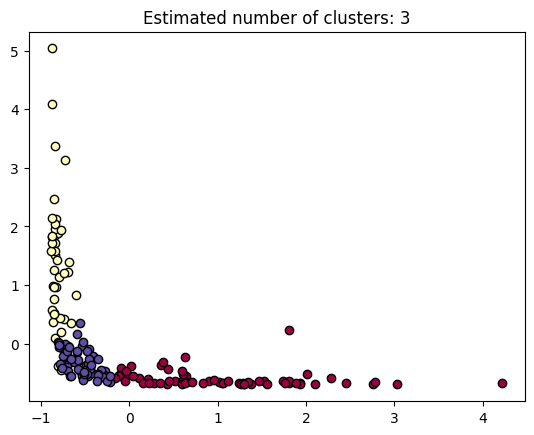

In [203]:
# ######################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_ygmm = set(y_gmm)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_ygmm))]
for k, col in zip(unique_ygmm, colors):
  konz = konz+1
  if k == -1:
    # Black used for noise.
    col = [0, 0, 0, 1]
  class_member_mask = (y_gmm == k)
  xy = df_temp2[class_member_mask]
  print(len(xy))
  plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor = tuple(col), markeredgecolor = 'k', markersize = 6)
  
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



In [205]:
df_temp1['DBSCAN cluster'] = labels
df_temp1['GMM cluster'] = y_gmm

print(df_temp1)

                 country  child_mort   gdpp  DBSCAN cluster  GMM cluster
0            Afghanistan        90.2    553               0            0
1                Albania        16.6   4090               0            2
2                Algeria        27.3   4460               0            2
3                 Angola       119.0   3530               0            0
4    Antigua and Barbuda        10.3  12200               0            2
..                   ...         ...    ...             ...          ...
162              Vanuatu        29.2   2970               0            2
163            Venezuela        17.1  13500               0            2
164              Vietnam        23.3   1310               0            2
165                Yemen        56.3   1310               0            0
166               Zambia        83.1   1460               0            0

[167 rows x 5 columns]


<ipython-input-205-f0fd46463bc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['DBSCAN cluster'] = labels
<ipython-input-205-f0fd46463bc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp1['GMM cluster'] = y_gmm
